- Métodos de filtrado: Son aquellos que utilizan medidas estadísticas para ordenar las variables por su significancia.

# Matriz de correlación

La correlación es cualquier asociación estadística, aunque comúnmente se refiere al grado en que un par de variables están relacionadas linealmente.

Los valores de correlación oscilan entre -1 y 1.

Hay dos componentes clave de un valor de correlación:
- Magnitud: cuanto mayor sea la magnitud (más cercana a 1 o -1), mayor será la correlación
- Signo: si es negativo, hay una correlación inversa. Si es positivo, hay una correlación regular o directa entre las variables.

In [1]:
from sklearn.datasets import load_boston

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [2]:
# Cargamos un conjunto de datos
boston_dataset = load_boston()
# Se carga con pandas para tratamiento posterior
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

# calculamos la matriz de correlacion mediante la funcion de pandas
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


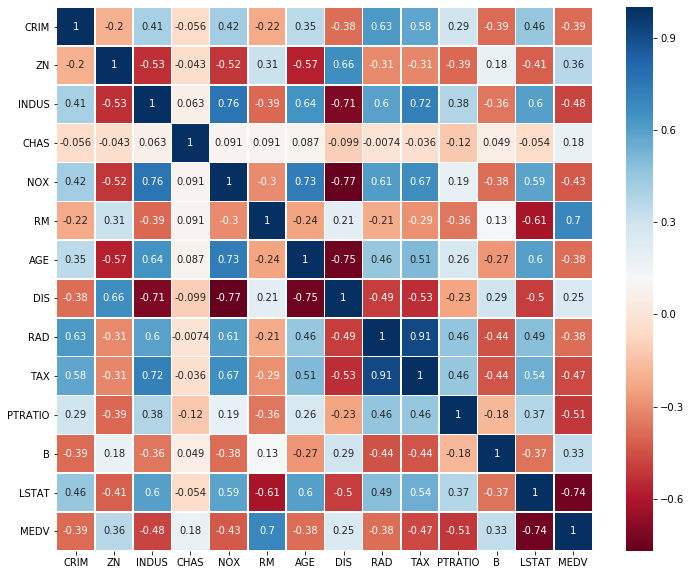

In [4]:
# realizamos una gráfica con un mapa de calor que es mucho más intuitivo
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(corr, linewidth=0.5,annot=True,cmap="RdBu");

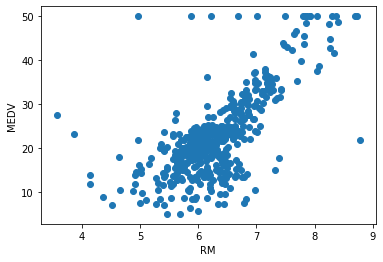

In [6]:
# Correlación positiva de los valores más caracteristicos.
# la gráfica nos indica que a medida que la casa tiene más habitaciones el costo de 
# la misma aumenta. Es una correlación positiva tal y como nos indicaba nuestro
# mapa de calor (+0.7)
plt.scatter(df.RM,df.MEDV);
plt.xlabel("RM")
plt.ylabel("MEDV");

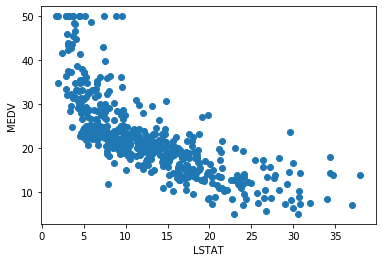

In [7]:
#Correlación negativa de los valores más caracteristicos.
# la gráfica nos indica que a medida que la pobreza en la zona promedio donde está la casa
# aumenta, el valor de la casa disminuye.Es una correlación negativa tal y como nos 
# indicaba nuestro mapa de calor (-0.74)
plt.scatter(df.LSTAT,df.MEDV);
plt.xlabel("LSTAT")
plt.ylabel("MEDV");

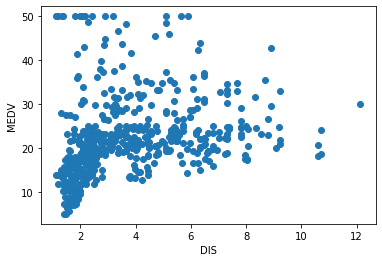

In [8]:
# Sin Correlación
# probamos una variable con un valor de 0.25 que no tiene una
# correlación clara. Al principio de la gráfica vemos que a medida
# que crece DIS crece también el precio de la casa, pero al poco
# de subir los valores de dispersan sin correlacion alguna
plt.scatter(df.DIS,df.MEDV);
plt.xlabel("DIS")
plt.ylabel("MEDV");

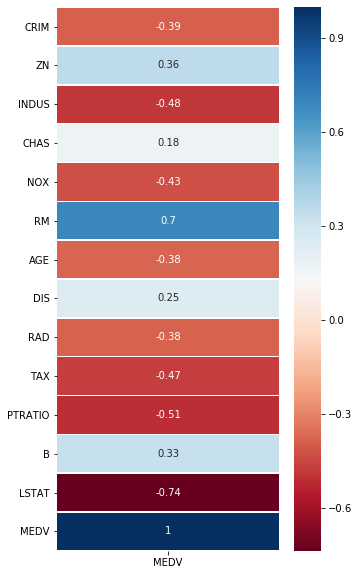

In [9]:
# cuando ya tenemos claro los valores que tienen correlacion 
# simplificamos nuestra gráfica de calor

plt.figure(figsize=(5,10))
sns.heatmap(pd.DataFrame(corr.MEDV), annot=True,linewidth=0.5,cmap="RdBu");

In [14]:
corr.MEDV.sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

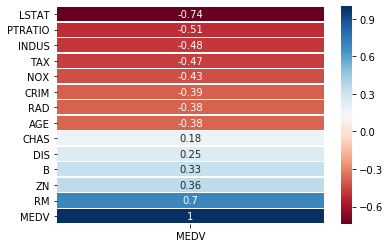

In [16]:
sns.heatmap(pd.DataFrame(corr.MEDV.sort_values()), annot=True,linewidth=0.5,cmap="RdBu");